In [ ]:
# Second Assignment, please fill out the following instruction
# This assigment is about the data visualization and K means clustering
# I have already provided most of the codes, it is important that you write your observations and analysis where it requried 
# to receive a grade. 
# Name : Matt Mancuso
# Due Date: October 26th 


In [4]:
# Packages required to Read the Titanic Data
import pandas as pd
from pandas import Series, DataFrame

In [5]:
# package requires to perform the operation
import numpy as np

In [6]:
# package require to perform the data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
# Read the data and store in titanicdf data frame
titanicdf =pd.read_csv('titanictrain.csv')

In [8]:
# to get the first 5 records
titanicdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# get the info about the variables and its datatypes
titanicdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
# describe the variables
titanicdf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


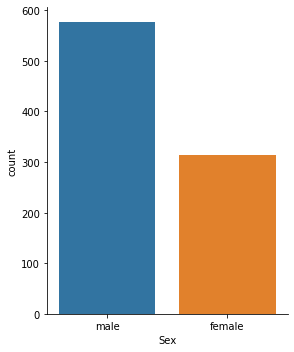

In [11]:
# create a barchart to describe the male vs female ratio. What is your observation
sns.catplot('Sex', data = titanicdf,kind="count", height=5, aspect=.8)
#My observation is that there were almost double the amount of males compared to females 

(array([0, 1]), <a list of 2 Text xticklabel objects>)

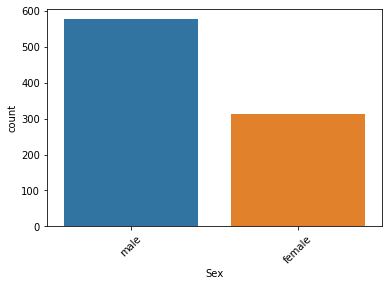

In [12]:
# other way to create Bar Plot
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Sex', data=titanicdf)
 
# Rotate x-labels
plt.xticks(rotation=45)

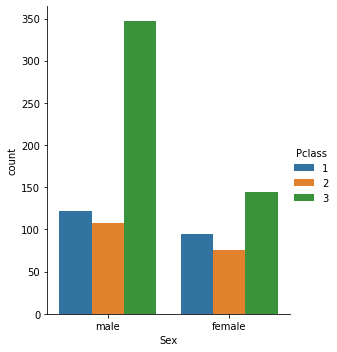

In [13]:
# create a barchart to describe the male vs female ratio in terms of the classes (Pclass). What is your observation
sns.catplot('Sex', data = titanicdf,kind="count", hue = 'Pclass', height=5, aspect=.8)
#My observation is that the males primarly belonged to the PClass 3 while the females' distrubution between classes were about even, although the Class3 did have the most members 

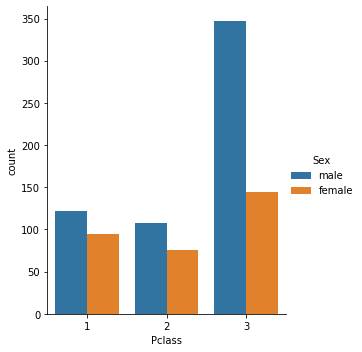

In [14]:
# create a barchart to describe the Pclass ratio in terms of the gender (Sex). What is your observation
sns.catplot('Pclass', data = titanicdf,kind="count", hue = 'Sex', height=5, aspect=.8)

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Titanic Passengers Age distribution')

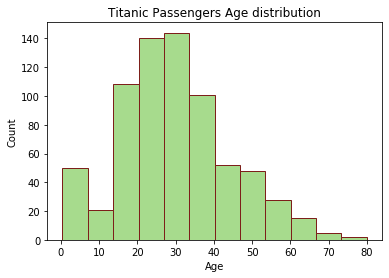

In [15]:
plt.hist(titanicdf.Age,bins = 12, # number of bins
         color = '#A7DB8D', # color of histogram
         edgecolor="#7D1F1A" # color of bin's border
        )
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Titanic Passengers Age distribution')


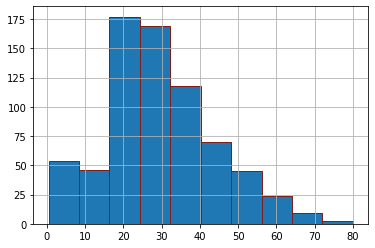

In [16]:
# another method for histogram
titanicdf['Age'].hist(edgecolor="#7D1F1A")

In [17]:
def mfc(rahul):
    age, sex = rahul
    
    if age < 18:
        return 'child'
    else:
        return sex

In [18]:
titanicdf['gender'] = titanicdf[['Age', 'Sex']].apply(mfc, axis =1)

In [19]:
titanicdf[0:9]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female


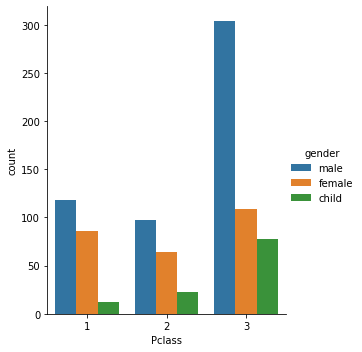

In [20]:
# create a barchart to describe the Pclass ratio in terms of the gender. What is your observation
sns.catplot('Pclass', data = titanicdf,kind="count", hue = 'gender', height=5, aspect=.8)

In [21]:
# describe about the age of the titanic passenger
titanicdf['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [22]:
# find out the number of passengers gender wise
titanicdf['gender'].value_counts()

male      519
female    259
child     113
Name: gender, dtype: int64

<Figure size 1080x720 with 0 Axes>

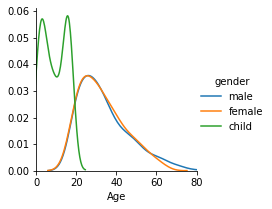

In [23]:
# facet grid allows to have multiple plots on one figure
plt.figure(figsize=(15,10))
at = sns.FacetGrid(titanicdf, hue = 'gender')
at.map(sns.kdeplot, 'Age')
elder = titanicdf['Age'].max()
at.set(xlim = (0,elder))
at.add_legend()

In [24]:
titanicdf['socialdistance'] = titanicdf['Parch'] + titanicdf["SibSp"]
titanicdf[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gender,socialdistance
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,1


In [25]:
# convert the socialdistance coloumn to levels
titanicdf['socialdistance'].loc[titanicdf['socialdistance']>0] = 'company'
titanicdf['socialdistance'].loc[titanicdf['socialdistance'] == 0] = 'alone'

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [26]:
titanicdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gender,socialdistance
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,company
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,company
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,company
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,alone


In [27]:
titanicdf['socialdistance'].value_counts()

alone      537
company    354
Name: socialdistance, dtype: int64

In [28]:
titanicdf['status'] = titanicdf.Survived.map({0:'n',1:'y'})
titanicdf['status'].value_counts()

n    549
y    342
Name: status, dtype: int64

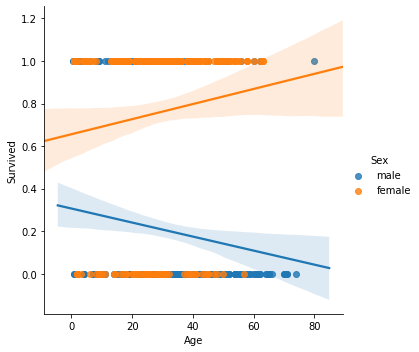

In [29]:
sns.lmplot('Age', 'Survived', hue = 'Sex', data = titanicdf)

## Unsupervised Learning (KMeans Clustering)


In [3]:
# package required for data and Kmeans 
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from scipy.spatial.distance import cdist
# packages required for preprocessing of the data
from sklearn.preprocessing import LabelEncoder

In [30]:
iris = sns.load_dataset('iris')

In [31]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [32]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [33]:
iris1 = iris.drop('species', axis = 1)

In [34]:
iris1km = KMeans(n_clusters = 3, random_state = 10)

In [35]:
iris1km.fit(iris1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [37]:
iris1km.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [37]:
iris1km.inertia_

78.85144142614601

In [38]:
specieslabels = iris1km.fit_predict(iris1)
print(specieslabels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [39]:
ir = iris

In [40]:
ir['pred'] = specieslabels

In [41]:
ir.head()

,sepal_length,sepal_width,petal_length,petal_width,species,pred
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


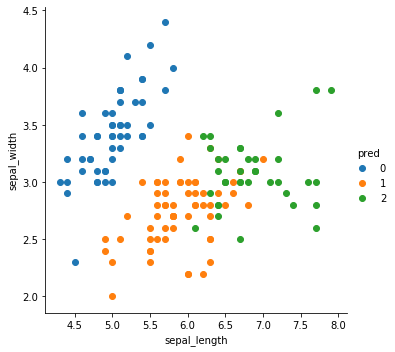

In [42]:
sns.FacetGrid(ir, hue = "pred", height = 5).map(plt.scatter, "sepal_length", "sepal_width").add_legend()

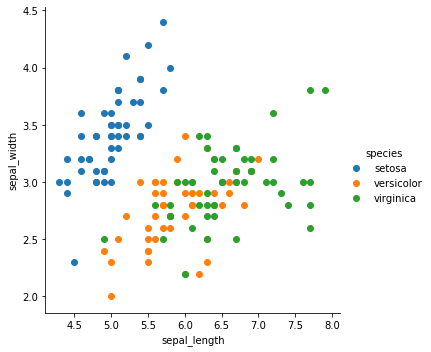

In [44]:
sns.FacetGrid(ir, hue = "species", height = 5).map(plt.scatter, "sepal_length", "sepal_width").add_legend()

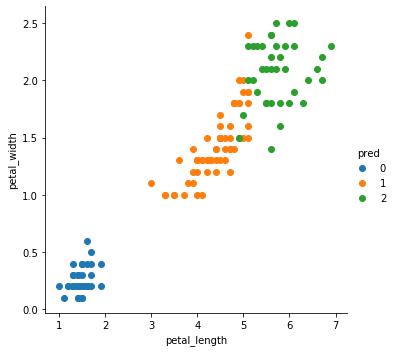

In [46]:
sns.FacetGrid(ir, hue = "pred", height = 5).map(plt.scatter, "petal_length", "petal_width").add_legend()

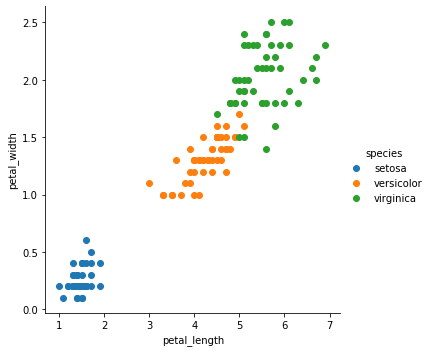

In [47]:
sns.FacetGrid(ir, hue = "species", height = 5).map(plt.scatter, "petal_length", "petal_width").add_legend()

In [48]:
# label encoding of species columns numerically
le = LabelEncoder()
le.fit(iris['species'])
print(le.classes_)
print(list(le.classes_))
iris['species'] = le.transform(iris['species'])

['setosa' 'versicolor' 'virginica']
['setosa', 'versicolor', 'virginica']


In [49]:
print(iris['species'][0:5])

print(iris['species'][80:90])

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64
80    1
81    1
82    1
83    1
84    1
85    1
86    1
87    1
88    1
89    1
Name: species, dtype: int64


In [50]:
sm.accuracy_score(iris.species,iris1km.labels_)

0.8933333333333333

In [52]:
# How many cases has been misclassfied
#16 cases are misclassified
#confusion matrix
sm.confusion_matrix(iris.species,iris1km.labels_)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]])

In [70]:
# find out the percentage of the misclassfied cases
MisClassCases= 16/150
Miss= MisClassCases *100
#The "16" is the number of misclassified cases and I got "150" from the iris.info() function before
print ((str(Miss)) + "% of the cases are misclassified")

10.666666666666668% of the cases are misclassified
